In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
import nanonets_utils

cmeter      = 1/2.54
single_col  = 8.6
gates       = ['AND','OR','XOR','NAND','NOR','XNOR']

In [14]:
df1, df2    = nanonets_utils.get_boolean_data("/home/jonas/phd/data/system_size_scale/", 7, 8)
fitness     = nanonets_utils.fitness(df1, 5, delta=0)

In [24]:
high_F_index    = []
high_F_values   = []

for gate in gates:

    high_F_index.append(fitness.sort_values(by=f'{gate} Fitness', ascending=False).reset_index(drop=True).loc[:10,['C1','C2','C3','C4','C5']].values)
    high_F_values.append(fitness.sort_values(by=f'{gate} Fitness', ascending=False).reset_index(drop=True).loc[:10,f'{gate} Fitness'].values)

In [93]:
high_F_index    = []
high_F_values   = []
F_th            = 10

for gate in gates:

    high_F_index.append(fitness.loc[fitness[f'{gate} Fitness'] > F_th, :].sort_values(by=f'{gate} Fitness', ascending=True).reset_index(drop=True).loc[:10,['C1','C2','C3','C4','C5']].values)
    high_F_values.append(fitness.loc[fitness[f'{gate} Fitness'] > F_th, :].sort_values(by=f'{gate} Fitness', ascending=True).reset_index(drop=True).loc[:10,f'{gate} Fitness'].values)

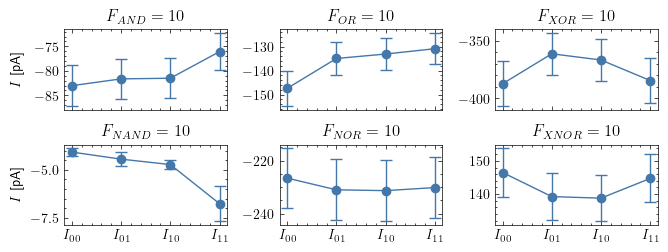

In [100]:
nth_fitness = 0

with plt.style.context(["science","bright"]):

    fig = plt.figure()
    fig.set_figwidth(2*single_col*cmeter)

    for nth_gate in range(6):

        ax  = fig.add_subplot(2,3,nth_gate+1)

        values = df1[(df1['C1']==high_F_index[nth_gate][nth_fitness,0]) & (df1['C2']==high_F_index[nth_gate][nth_fitness,1])]['Current'].values
        erros  = df1[(df1['C1']==high_F_index[nth_gate][nth_fitness,0]) & (df1['C2']==high_F_index[nth_gate][nth_fitness,1])]['Error'].values

        ax.errorbar(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y=values, yerr=erros, marker='o', capsize=4)

        if ((nth_gate == 0) or (nth_gate == 3)):
            ax.set_ylabel("$I$ [pA]")
        
        if (nth_gate < 3):
            ax.set_xticklabels("")
        
        ax.yaxis.set_label_coords(-0.25, 0.5)
        ax.set_title("$F_{"+f"{gates[nth_gate]}"+"} = "+f"{int(high_F_values[nth_gate][nth_fitness])}$")
    
    fig.tight_layout()
        # ax.set_yticklabels("")